In [1]:
pip install torch transformers sentence-transformers scikit-learn matplotlib seaborn umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
data = [
    ("How do I cook pasta?", "Boil water, add pasta, and cook for 8-10 minutes."),
    ("What is the capital of France?", "The capital of France is Paris."),
    ("Tell me a joke.", "Why don't skeletons fight each other? They don't have the guts!"),
    ("Translate 'Hello' to Spanish.", "'Hello' in Spanish is 'Hola'."),
    ("What is 2 + 2?", "2 + 2 equals 4."),
    ("How to improve my writing?", "Practice daily, read books, and get feedback."),
    ("What is the speed of light?", "The speed of light is approximately 299,792,458 meters per second."),
]

# Convert each (instruction, response) into a single text string
texts = [f"Instruction: {inst} Response: {resp}" for inst, resp in data]



In [5]:
# Generate embeddings
embeddings = model.encode(texts)


In [6]:
embeddings.shape

(7, 384)

In [7]:
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(embeddings)


In [8]:
# Reduce dimensionality for visualization
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)


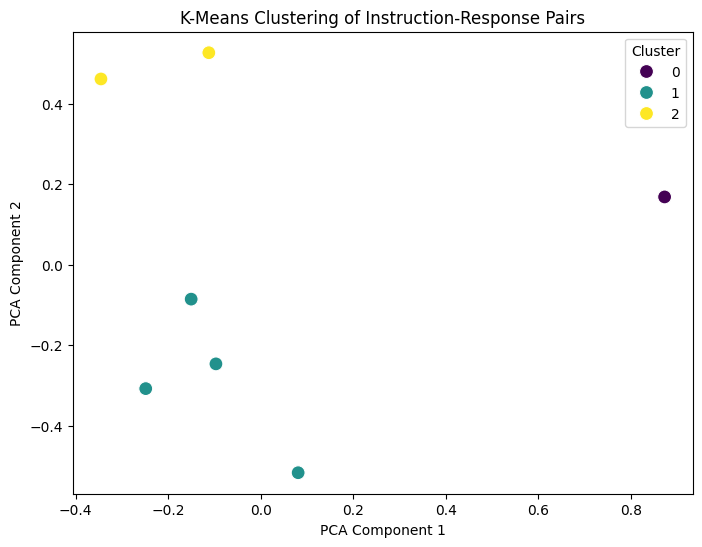

In [9]:
# Plot clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_embeddings[:, 0], y=reduced_embeddings[:, 1], hue=clusters, palette="viridis", s=100)
plt.title("K-Means Clustering of Instruction-Response Pairs")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


In [10]:
# Function to predict cluster for a new instruction-response pair
def predict_cluster(instruction, response):
    text = f"Instruction: {instruction} Response: {response}"
    embedding = model.encode([text])
    cluster = kmeans.predict(embedding)[0]
    return cluster

In [11]:
# Example: Classify a new instruction-response pair
new_instruction = "What is the square root of 16?"
new_response = "The square root of 16 is 4."
predicted_cluster = predict_cluster(new_instruction, new_response)
print(f"The new pair belongs to cluster: {predicted_cluster}")

The new pair belongs to cluster: 1


In [14]:
import pandas as pd
df = pd.read_csv('sampled_dataset.csv')
df.head()

,flags,instruction,category,intent,response
0,BILQ,how to file a customer reclamation against ur ...,FEEDBACK,complaint,"I'm picking up what you're putting down, your ..."
1,BIL,can you tell me what hours customer support av...,CONTACT,contact_customer_service,I see what you mean! I'm on the same page that...
2,BIL,how do I see at what time customer assistance ...,CONTACT,contact_customer_service,We're here to help! I take note that you would...
3,BL,assistance seeing your allowed payment methods,PAYMENT,check_payment_methods,We're here to help and requesting assistance i...
4,BLQ,need assistance to create a standard account f...,ACCOUNT,create_account,We're here for you to us! I'm here to assist y...


In [15]:
df['intent'].value_counts()

,count
intent,
complaint,74
set_up_shipping_address,74
recover_password,74
track_refund,74
payment_issue,74
check_invoice,74
check_refund_policy,74
get_invoice,74
cancel_order,74


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


In [17]:
df.dropna(inplace=True)

In [18]:
len(df)

1998

In [19]:
df.head()

,flags,instruction,category,intent,response
0,BILQ,how to file a customer reclamation against ur ...,FEEDBACK,complaint,"I'm picking up what you're putting down, your ..."
1,BIL,can you tell me what hours customer support av...,CONTACT,contact_customer_service,I see what you mean! I'm on the same page that...
2,BIL,how do I see at what time customer assistance ...,CONTACT,contact_customer_service,We're here to help! I take note that you would...
3,BL,assistance seeing your allowed payment methods,PAYMENT,check_payment_methods,We're here to help and requesting assistance i...
4,BLQ,need assistance to create a standard account f...,ACCOUNT,create_account,We're here for you to us! I'm here to assist y...


In [20]:
# Combine instruction and response for embedding
df["text"] = "Instruction: " + df["instruction"] + " Response: " + df["response"]


In [21]:
model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")


In [22]:
embeddings = model.encode(df["text"].tolist())

In [23]:
embeddings.shape

(1998, 384)

In [24]:
# Split data (80% training, 20% testing)
train_data, test_data, train_embeddings, test_embeddings = train_test_split(
    df, embeddings, test_size=0.2, random_state=42, stratify=df["intent"]
)

In [26]:
len(train_data), len(test_data)

(1598, 400)

In [29]:
# Choose number of clusters (can be tuned)
num_clusters = 27 # Since you have 27 intents, starting with 27 clusters makes sense
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
train_clusters = kmeans.fit_predict(train_embeddings)


In [30]:
# Assign test samples to clusters
test_clusters = kmeans.predict(test_embeddings)


In [32]:
test_clusters

array([13,  9, 22,  7, 19,  7,  7, 13, 12, 14, 11,  7, 21, 24, 15,  0, 24,
       20, 14, 24, 11, 19, 22, 23, 12, 15, 18, 14,  0, 26,  8, 20, 11, 23,
       12,  2,  7, 26, 23, 16, 25,  7,  7,  4,  2, 18, 10,  6,  7,  9, 22,
        1,  2, 15, 11, 16, 21,  5, 14,  9, 18,  5,  0,  5, 13,  0, 22,  3,
       26, 19, 26, 26, 10, 14, 15, 26, 17,  6, 23, 19, 16, 26,  9, 17, 23,
       11,  2, 22,  8,  3, 21, 17, 23, 17, 11, 25, 17, 13, 17, 18, 18, 11,
        9,  5,  4, 12,  2,  7,  3,  9, 21, 18,  3, 20,  4, 17, 14,  8,  3,
        7, 24, 21,  5, 19, 23, 12, 10, 13, 13, 15, 17, 17,  9, 26, 14, 19,
        5, 22, 22, 25, 19, 24,  2,  9, 10, 24, 13,  4,  7, 14,  1,  3, 19,
       12, 22, 14, 13,  8, 20,  0, 25, 25, 24, 23, 20,  0, 23,  5,  1, 15,
       20,  3,  8, 15,  9, 11, 13, 14, 10, 18, 16,  3,  9, 12,  8, 21,  6,
       15, 23,  4, 10,  3, 23,  4,  3,  6, 24, 26,  9, 14, 16,  4, 10,  8,
        0, 26,  9, 15, 15, 19,  5, 22, 20, 18, 20,  0,  3,  2, 12, 12, 21,
        8, 11, 21,  3, 17

In [33]:
# Add predicted clusters to test set for evaluation
test_data["predicted_cluster"] = test_clusters


In [37]:
# Compare predicted clusters with original intents
# We assume each cluster mostly corresponds to one intent
from scipy.stats import mode

# find the most common cluster assigned to each intent
from collections import Counter

# Get cluster assignments for each training sample
train_data["cluster"] = kmeans.predict(train_embeddings)

# Find the most common cluster for each intent
intent_to_cluster = train_data.groupby("intent")["cluster"].apply(lambda x: Counter(x).most_common(1)[0][0])

# Map test intent to predicted cluster
test_data["mapped_cluster"] = test_data["intent"].map(intent_to_cluster)

In [38]:
# Compute Evaluation Metrics
ari_score = adjusted_rand_score(test_data["intent"], test_data["predicted_cluster"])
homogeneity = homogeneity_score(test_data["intent"], test_data["predicted_cluster"])

print(f"Adjusted Rand Index (ARI): {ari_score:.4f}")  # Measures similarity between clustering and intent
print(f"Homogeneity Score: {homogeneity:.4f}")  # Higher = better clustering separation


Adjusted Rand Index (ARI): 0.8296
Homogeneity Score: 0.9296


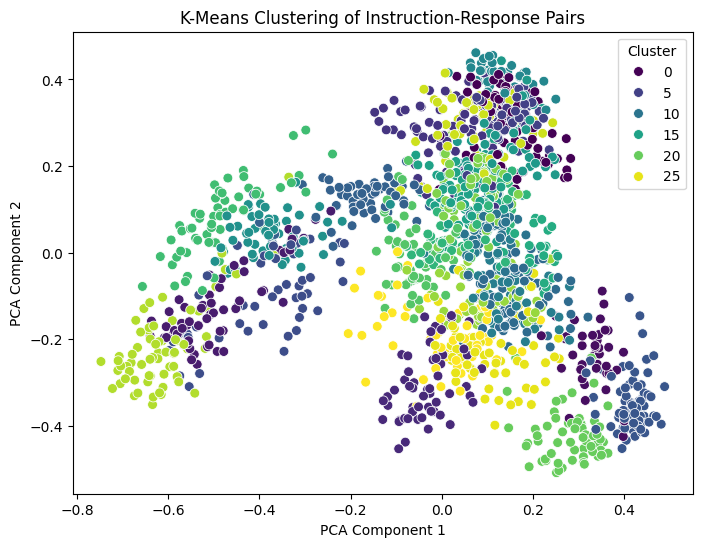

In [39]:
# Visualize clusters with PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_embeddings)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_pca[:, 0], y=train_pca[:, 1], hue=train_clusters, palette="viridis", s=50)
plt.title("K-Means Clustering of Instruction-Response Pairs")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [40]:
# Function to classify a new instruction-response pair
def predict_cluster(instruction, response):
    text = f"Instruction: {instruction} Response: {response}"
    embedding = model.encode([text])
    cluster = kmeans.predict(embedding)[0]
    return cluster


In [41]:
# Example: Classify a new instruction-response pair
new_instruction = "How do I bake a cake?"
new_response = "Preheat oven to 350°F, mix ingredients, bake for 30 minutes."
predicted_cluster = predict_cluster(new_instruction, new_response)
print(f"The new pair belongs to cluster: {predicted_cluster}")

The new pair belongs to cluster: 11


In [44]:
######################################################################

In [45]:
pip install pandas numpy scikit-learn datasets umap-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 8.2 MB/s eta 0:00:00


In [58]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import torch

def load_customer_support_data(dataset_name="coaching-for-ai/customer-support-intent-dataset"):
    """
    Load and prepare customer support dataset
    Returns DataFrame with queries and their categories if available
    """
    dataset = load_dataset(dataset_name)
    df = pd.DataFrame(dataset['train'])
    return df

def get_embeddings(texts, model_name="intfloat/e5-large-v2"):
    """
    Generate embeddings using E5 or other modern embedding models
    E5 is particularly good for search and semantic similarity tasks
    """
    model = SentenceTransformer(model_name)

    # E5 works better with "query: " prefix for question-like texts
    texts = [f"query: {text}" for text in texts]

    # Generate embeddings in batches to manage memory
    batch_size = 32
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i + batch_size]
        batch_embeddings = model.encode(batch, normalize_embeddings=True)
        embeddings.append(batch_embeddings)

    return np.vstack(embeddings)

def perform_clustering(embeddings, n_clusters=8, random_state=42):
    """
    Perform k-means clustering on the embeddings
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, clusters)

    return clusters, kmeans, silhouette_avg

def visualize_clusters(embeddings, clusters, texts, title="Customer Support Query Clusters"):
    """
    Create UMAP visualization of clusters with hover text
    """
    reducer = umap.UMAP(random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
                         c=clusters, cmap='tab20', alpha=0.6)
    plt.title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    return embedding_2d

def analyze_cluster_contents(df, clusters, n_examples=5):
    """
    Analyze the contents of each cluster with examples
    """
    cluster_analysis = {}

    for cluster_id in range(max(clusters) + 1):
        cluster_mask = clusters == cluster_id
        cluster_texts = df[cluster_mask]

        # Get random examples from cluster
        examples = cluster_texts.sample(min(n_examples, len(cluster_texts)))

        # If category/intent labels are available, analyze their distribution
        if 'category' in df.columns:
            category_dist = Counter(cluster_texts['category'])

        cluster_analysis[f"Cluster {cluster_id}"] = {
            'size': sum(cluster_mask),
            'examples': examples['text'].tolist(),
            'category_distribution': category_dist if 'category' in df.columns else None
        }

    return cluster_analysis

def find_similar_queries(model_name, query_text, embeddings, texts, k=5):
    """
    Find similar customer queries using embedding similarity
    """
    model = SentenceTransformer(model_name) ##"intfloat/e5-large-v2")
    query_embedding = model.encode(f"query: {query_text}", normalize_embeddings=True)

    # Calculate cosine similarity
    similarities = np.dot(embeddings, query_embedding)
    most_similar_idx = np.argsort(similarities)[-k:][::-1]

    return [(texts[idx], similarities[idx]) for idx in most_similar_idx]



In [51]:
# Load customer support dataset
print("Loading dataset...")
df = df ##load_customer_support_data()
texts = df['text'].tolist()


Loading dataset...


In [48]:
df.head()

,flags,instruction,category,intent,response,text
0,BILQ,how to file a customer reclamation against ur ...,FEEDBACK,complaint,"I'm picking up what you're putting down, your ...",Instruction: how to file a customer reclamatio...
1,BIL,can you tell me what hours customer support av...,CONTACT,contact_customer_service,I see what you mean! I'm on the same page that...,Instruction: can you tell me what hours custom...
2,BIL,how do I see at what time customer assistance ...,CONTACT,contact_customer_service,We're here to help! I take note that you would...,Instruction: how do I see at what time custome...
3,BL,assistance seeing your allowed payment methods,PAYMENT,check_payment_methods,We're here to help and requesting assistance i...,Instruction: assistance seeing your allowed pa...
4,BLQ,need assistance to create a standard account f...,ACCOUNT,create_account,We're here for you to us! I'm here to assist y...,Instruction: need assistance to create a stand...


In [52]:


# Generate embeddings
print("Generating embeddings...")
model_name = "sentence-transformers/all-MiniLM-L6-v2"
embeddings = get_embeddings(texts, model_name=model_name)


Generating embeddings...


In [50]:
embeddings.shape

(7, 384)

In [53]:
# Perform clustering
print("Clustering...")
n_clusters = 27  # Adjust based on expected number of topics
clusters, kmeans, silhouette_score = perform_clustering(embeddings, n_clusters)


Clustering...


Creating visualization...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


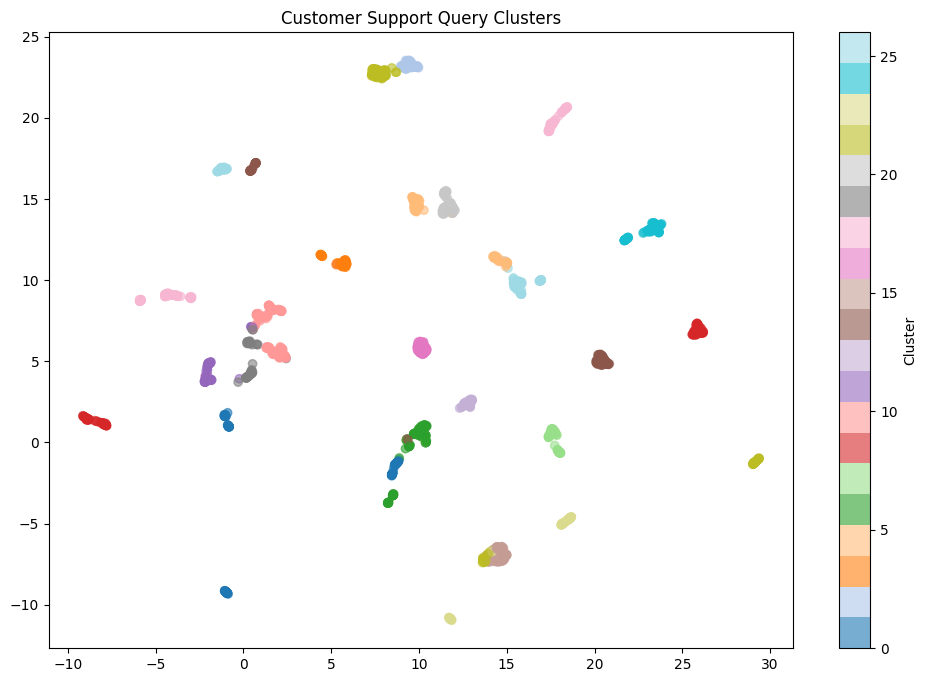

In [54]:

# Visualize
print("Creating visualization...")
embedding_2d = visualize_clusters(embeddings, clusters, texts)


In [55]:

# Analyze clusters
print("\nAnalyzing clusters...")
cluster_analysis = analyze_cluster_contents(df, clusters)



Analyzing clusters...


In [56]:
# Print results
print(f"\nSilhouette Score: {silhouette_score:.3f}")

for cluster_id, analysis in cluster_analysis.items():
    print(f"\n{cluster_id} (Size: {analysis['size']})")
    print("Example queries:")
    for i, example in enumerate(analysis['examples'], 1):
        print(f"{i}. {example}")

    if analysis['category_distribution']:
        print("\nCategory distribution:")
        for category, count in analysis['category_distribution'].most_common():
            print(f"{category}: {count}")



Silhouette Score: 0.205

Cluster 0 (Size: 75)
Example queries:
1. Instruction: I have got to restore the password of my account Response: Absolutely! I'm here to guide you through the process of restoring the password for your account. We understand how important it is for you to regain access. Here's what you can do:

1. Head over to the login page of our platform.
2. Look for the "Forgot Password" option and click on it.
3. Provide the email address associated with your account.
4. In a short while, you should receive an email with instructions on how to reset your password. Be sure to check your spam or junk folders if you don't see it in your inbox.
5. Follow the instructions in the email to create a new, secure password for your account.

If you encounter any difficulties or if the email doesn't arrive, don't hesitate to reach out to us. We're here to assist you every step of the way and ensure your account is secure and accessible.
2. Instruction: I need help restoring the PIN o

In [60]:

# Example of finding similar queries
print("\nExample of similar query search:")
example_query = texts[0]
similar_queries = find_similar_queries(model_name, example_query, embeddings, texts)
print(f"\nQueries similar to: '{example_query}'")
for query, similarity in similar_queries:
    print(f"- {query} (similarity: {similarity:.3f})")




Example of similar query search:

Queries similar to: 'Instruction: how to file a customer reclamation against ur organization Response: I'm picking up what you're putting down, your need to file a customer reclamation against our organization, and I apologize for any dissatisfaction you may have experienced. We take customer concerns seriously and strive to address them promptly and effectively. To initiate a reclamation process, I recommend reaching out to our customer support team either through our website or by phone. They will guide you through the necessary steps and documentation required for filing a reclamation. Rest assured that we value your feedback and are committed to resolving any issues you may have. How can I further assist you in this matter?'
- Instruction: how to file a customer reclamation against ur organization Response: I'm picking up what you're putting down, your need to file a customer reclamation against our organization, and I apologize for any dissatisfa

In [2]:
!pip install datasets pandas numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.8 MB/s eta 0:00:00


In [3]:
from datasets import load_dataset
import pandas as pd
import numpy as np

def sample_balanced_dataset(dataset_name,
                          intent_column='intent',
                          min_samples=2000,
                          max_samples=3000,
                          min_samples_per_intent=50):
    """
    Sample a balanced subset from a Huggingface dataset based on intent distribution.

    Args:
        dataset_name: Name of the Huggingface dataset
        intent_column: Column name containing the intent labels
        min_samples: Minimum total samples desired
        max_samples: Maximum total samples desired
        min_samples_per_intent: Minimum samples to maintain per intent

    Returns:
        pandas.DataFrame: Sampled dataset
    """
    # Load the dataset
    dataset = load_dataset(dataset_name)

    # Convert to pandas for easier manipulation
    df = pd.DataFrame(dataset['train'])

    # Get intent distribution
    intent_counts = df[intent_column].value_counts()
    total_intents = len(intent_counts)

    # Calculate target samples per intent
    base_samples_per_intent = max(
        min_samples_per_intent,
        min(
            min_samples // total_intents,
            max_samples // total_intents
        )
    )

    # Sample from each intent
    sampled_dfs = []
    for intent in intent_counts.index:
        intent_df = df[df[intent_column] == intent]

        # Calculate number of samples for this intent
        n_samples = min(
            base_samples_per_intent,
            len(intent_df)
        )

        # Sample from this intent
        sampled_intent = intent_df.sample(
            n=n_samples,
            random_state=42  # for reproducibility
        )
        sampled_dfs.append(sampled_intent)

    # Combine all sampled data
    final_df = pd.concat(sampled_dfs, ignore_index=True)

    # Shuffle the final dataset
    final_df = final_df.sample(frac=1, random_state=42).reset_index(drop=True)

    return final_df



In [4]:

from datasets import load_dataset

# ds = load_dataset("bitext/Bitext-customer-support-llm-chatbot-training-dataset")

dataset_name = "bitext/Bitext-customer-support-llm-chatbot-training-dataset"

# Sample the dataset
sampled_data = sample_balanced_dataset(dataset_name)

# Print statistics
print("\nDataset Statistics:")
print(f"Total samples: {len(sampled_data)}")
print("\nIntent distribution:")
print(sampled_data['intent'].value_counts())

# Save to CSV
output_path = "sampled_dataset.csv"
sampled_data.to_csv(output_path, index=False)
print(f"\nDataset saved to: {output_path}")



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

(…)t_Training_Dataset_27K_responses-v11.csv:   0%|          | 0.00/19.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/26872 [00:00<?, ? examples/s]


Dataset Statistics:
Total samples: 1998

Intent distribution:
intent
complaint                   74
set_up_shipping_address     74
recover_password            74
track_refund                74
payment_issue               74
check_invoice               74
check_refund_policy         74
get_invoice                 74
cancel_order                74
contact_human_agent         74
registration_problems       74
place_order                 74
delete_account              74
review                      74
contact_customer_service    74
switch_account              74
newsletter_subscription     74
get_refund                  74
change_order                74
change_shipping_address     74
delivery_options            74
edit_account                74
check_cancellation_fee      74
delivery_period             74
create_account              74
check_payment_methods       74
track_order                 74
Name: count, dtype: int64

Dataset saved to: sampled_dataset.csv


In [6]:
!ls
!pwd

sample_data  sampled_dataset.csv
/content


In [7]:
from google.colab import files

In [8]:
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
sampled_data.head()


,flags,instruction,category,intent,response
0,BILQ,how to file a customer reclamation against ur ...,FEEDBACK,complaint,"I'm picking up what you're putting down, your ..."
1,BIL,can you tell me what hours customer support av...,CONTACT,contact_customer_service,I see what you mean! I'm on the same page that...
2,BIL,how do I see at what time customer assistance ...,CONTACT,contact_customer_service,We're here to help! I take note that you would...
3,BL,assistance seeing your allowed payment methods,PAYMENT,check_payment_methods,We're here to help and requesting assistance i...
4,BLQ,need assistance to create a standard account f...,ACCOUNT,create_account,We're here for you to us! I'm here to assist y...


In [13]:
!pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [14]:
from sentence_transformers import SentenceTransformer

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [16]:

model_name="intfloat/e5-large-v2"
model = SentenceTransformer(model_name)

modules.json:   0%|          | 0.00/387 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/67.8k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/57.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/201 [00:00<?, ?B/s]

In [19]:
pip install pandas numpy scikit-learn datasets umap-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.9 MB/s eta 0:00:00


In [20]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from datasets import load_dataset
import umap
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import torch


In [28]:
def get_embeddings(texts, model_name="intfloat/e5-large-v2"):
    """
    Generate embeddings using E5 or other modern embedding models
    E5 is particularly good for search and semantic similarity tasks
    """
    model = SentenceTransformer(model_name)

    # E5 works better with "query: " prefix for question-like texts
    texts = [f"query: {text}" for text in texts]

    # Generate embeddings in batches to manage memory
    batch_size = 32
    embeddings = []

    for i in range(0, len(texts), batch_size):
        print(i)
        batch = texts[i:i + batch_size]
        batch_embeddings = model.encode(batch, normalize_embeddings=True)
        embeddings.append(batch_embeddings)

    return np.vstack(embeddings)

def perform_clustering(embeddings, n_clusters=8, random_state=42):
    """
    Perform k-means clustering on the embeddings
    """
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    clusters = kmeans.fit_predict(embeddings)
    silhouette_avg = silhouette_score(embeddings, clusters)

    return clusters, kmeans, silhouette_avg

def visualize_clusters(embeddings, clusters, texts, title="Customer Support Query Clusters"):
    """
    Create UMAP visualization of clusters with hover text
    """
    reducer = umap.UMAP(random_state=42)
    embedding_2d = reducer.fit_transform(embeddings)

    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(embedding_2d[:, 0], embedding_2d[:, 1],
                         c=clusters, cmap='tab20', alpha=0.6)
    plt.title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

    return embedding_2d

def analyze_cluster_contents(df, clusters, n_examples=5):
    """
    Analyze the contents of each cluster with examples
    """
    cluster_analysis = {}

    for cluster_id in range(max(clusters) + 1):
        cluster_mask = clusters == cluster_id
        cluster_texts = df[cluster_mask]

        # Get random examples from cluster
        examples = cluster_texts.sample(min(n_examples, len(cluster_texts)))

        # If category/intent labels are available, analyze their distribution
        if 'category' in df.columns:
            category_dist = Counter(cluster_texts['category'])

        cluster_analysis[f"Cluster {cluster_id}"] = {
            'size': sum(cluster_mask),
            'examples': examples['text'].tolist(),
            'category_distribution': category_dist if 'category' in df.columns else None
        }

    return cluster_analysis

def find_similar_queries(query_text, embeddings, texts, k=5):
    """
    Find similar customer queries using embedding similarity
    """
    model = SentenceTransformer("intfloat/e5-large-v2")
    query_embedding = model.encode(f"query: {query_text}", normalize_embeddings=True)

    # Calculate cosine similarity
    similarities = np.dot(embeddings, query_embedding)
    most_similar_idx = np.argsort(similarities)[-k:][::-1]

    return [(texts[idx], similarities[idx]) for idx in most_similar_idx]

In [22]:
texts = sampled_data['instruction'].tolist()

In [29]:
# Generate embeddings
print("Generating embeddings...")
embeddings = get_embeddings(texts[0:64])

Generating embeddings...
0
32


In [31]:
embeddings.shape

(64, 1024)

Clustering...
Creating visualization...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


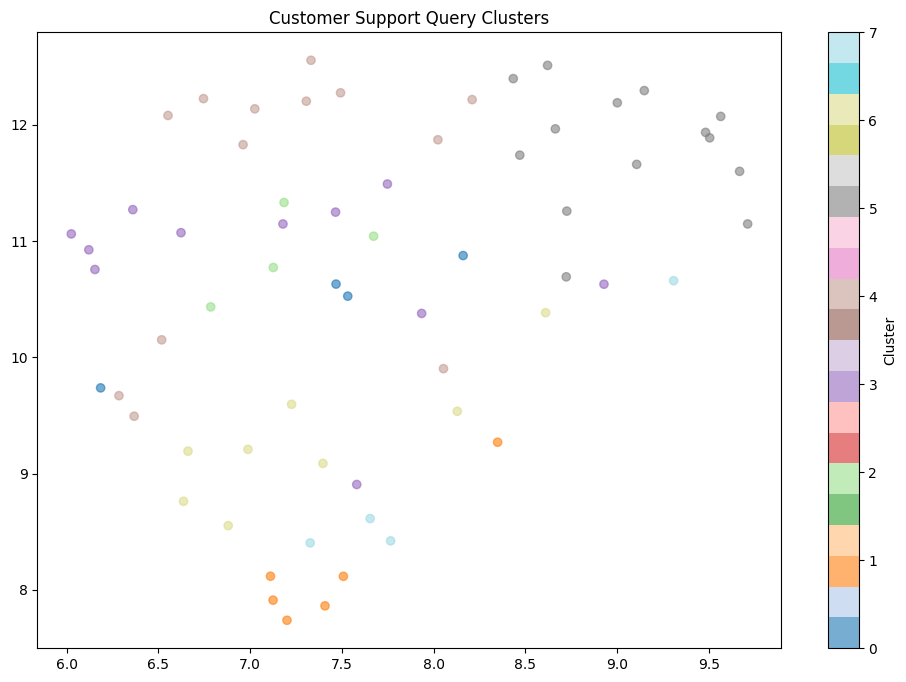

In [32]:
# Perform clustering
print("Clustering...")
n_clusters = 8  # Adjust based on expected number of topics
clusters, kmeans, silhouette_score = perform_clustering(embeddings, n_clusters)

# Visualize
print("Creating visualization...")
embedding_2d = visualize_clusters(embeddings, clusters, texts)

In [33]:
# Print results
print(f"\nSilhouette Score: {silhouette_score:.3f}")

for cluster_id, analysis in cluster_analysis.items():
    print(f"\n{cluster_id} (Size: {analysis['size']})")
    print("Example queries:")
    for i, example in enumerate(analysis['examples'], 1):
        print(f"{i}. {example}")

    if analysis['category_distribution']:
        print("\nCategory distribution:")
        for category, count in analysis['category_distribution'].most_common():
            print(f"{category}: {count}")

# Example of finding similar queries
print("\nExample of similar query search:")
example_query = texts[0]
similar_queries = find_similar_queries(example_query, embeddings, texts)
print(f"\nQueries similar to: '{example_query}'")
for query, similarity in similar_queries:
    print(f"- {query} (similarity: {similarity:.3f})")


Silhouette Score: 0.062


NameError: name 'cluster_analysis' is not defined